# Data

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, cluster

# Plot styling
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.style.use('ggplot')
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams["legend.fontsize"] = 11

df_train = pd.read_csv("IA3-train.csv")
df_val = pd.read_csv("IA3-dev.csv")

# 1. Explore Word Embeddings

## a. Build Your Own Data Set of Words (5pts)

In [21]:
from GloVe_Embedder import GloVe_Embedder

def buildData():
    GV_embedded = GloVe_Embedder("GloVe_Embedder_data.txt")
    seed_words = ["flight", "good", "terrible", "help", "late"]

    d150embd = [] # build data set of word vectors
    d150wrds = [] # build data set of words (raw)

    seed_words_embeddings = GV_embedded.embed_list(seed_words)
    clusterNum = 1

    for word in seed_words:
        embedding = GV_embedded.embed_str(word)
        d150embd.append(embedding) # append embedding of words
        d150wrds.append([word, int(clusterNum)]) # append word & cluster number (used for graphing)
        cluster = GV_embedded.find_k_nearest(embedding, 29)
        print(word, "cluster:")

        for w in cluster:
            print("\t", w[0], w[1])
            d150embd.append(GV_embedded.embed_str(w[0])) # append embedding of current words
            d150wrds.append([w[0], int(clusterNum)]) # append word & cluster number (used for graphing)
        clusterNum += 1
        print()

    return d150embd, d150wrds

In [22]:
d150embd, d150wrds = buildData()

flight cluster:
	 flight 0.0
	 plane 4.45689
	 flights 5.32675
	 boarding 5.4882
	 airline 5.58355
	 jet 5.59065
	 flying 5.59299
	 heading 5.6417
	 arrival 5.70659
	 airlines 5.85213
	 travel 5.89098
	 shuttle 5.90023
	 delayed 5.91624
	 landing 5.92666
	 route 5.96298
	 airplane 6.00258
	 safe 6.00877
	 booking 6.01374
	 fly 6.02409
	 departure 6.04052
	 waiting 6.04259
	 landed 6.09697
	 journey 6.12156
	 passengers 6.12345
	 transit 6.12451
	 delay 6.13663
	 crew 6.14757
	 pilot 6.17311
	 trip 6.18669

good cluster:
	 good 0.0
	 great 3.64107
	 well 3.96383
	 nice 4.00469
	 better 4.19665
	 night 4.30113
	 bad 4.34788
	 morning 4.43596
	 way 4.52146
	 hope 4.54451
	 but 4.55671
	 too 4.57775
	 really 4.60558
	 right 4.68877
	 though 4.69955
	 there 4.70148
	 day 4.70444
	 luck 4.7177
	 sure 4.76147
	 it 4.76949
	 thing 4.78543
	 pretty 4.81795
	 think 4.83542
	 have 4.84457
	 all 4.85276
	 yes 4.86179
	 very 4.89081
	 again 4.9018
	 work 4.90492

terrible cluster:
	 terrible 0.0
	 

## b. Dimension Reduction and Visualization (25pts)

### PCA

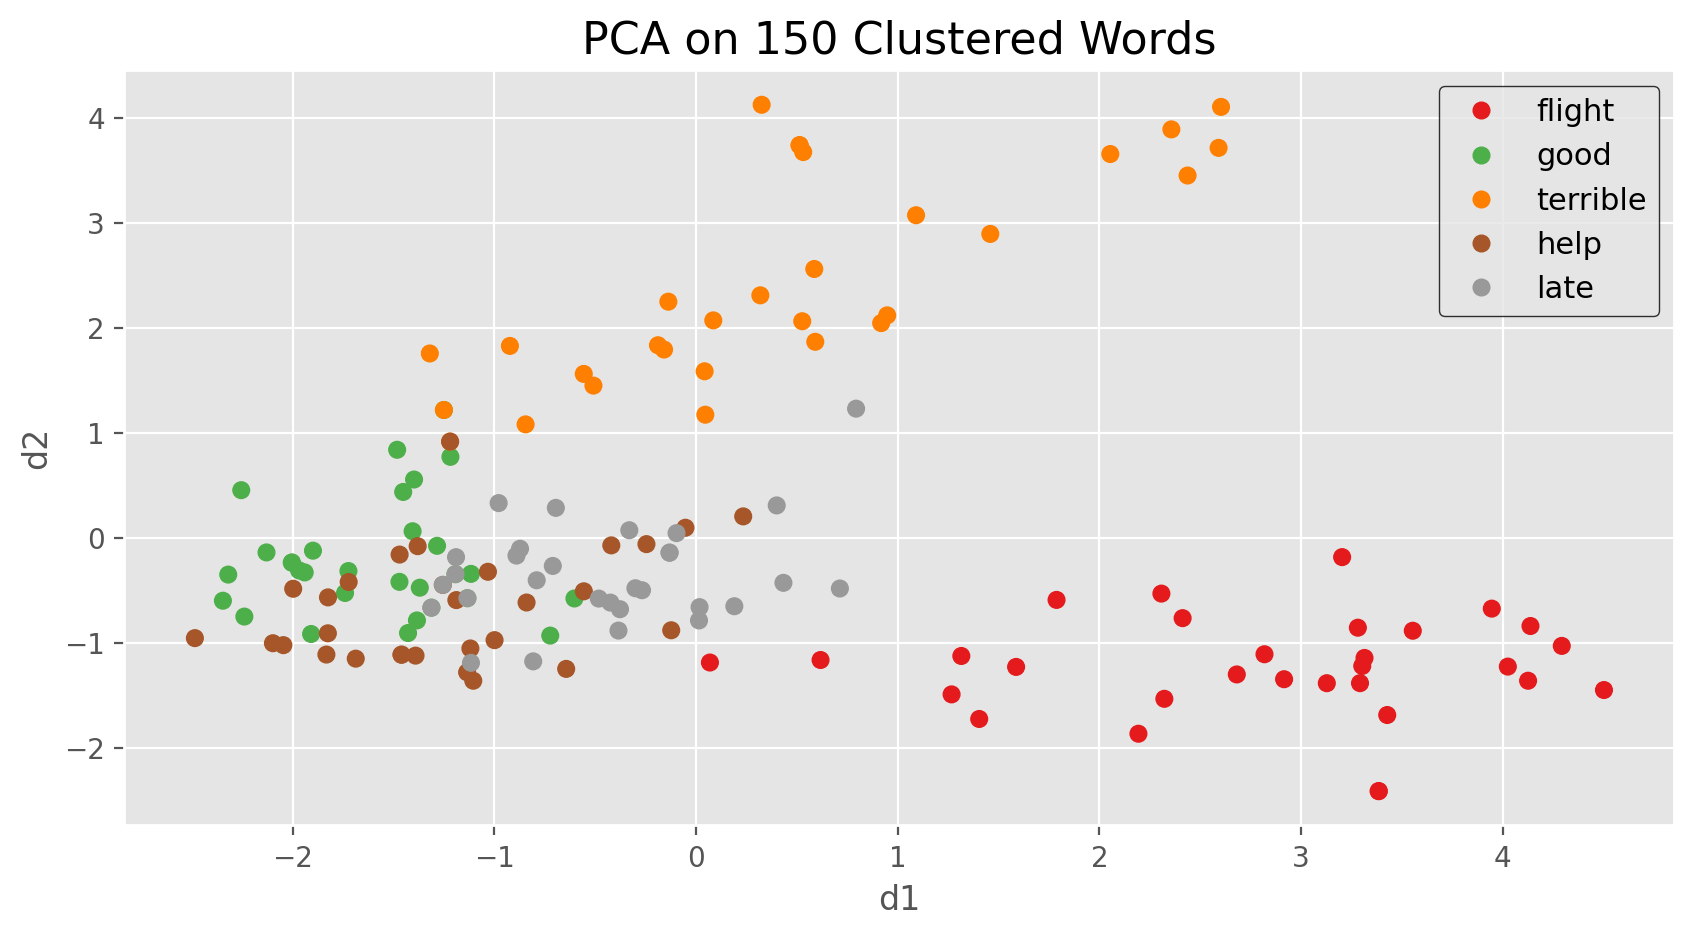

In [26]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(d150embd)
d150wrds = np.asarray(d150wrds)
plot_2d_cluster(X_2d, d150wrds, "PCA on 150 Clustered Words")

In [25]:
def plot_2d_cluster(X, d150, label):
    plt.figure(figsize=(10,5))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=np.asarray(d150[:,1], dtype=int), cmap="Set1")
    plt.legend(handles=scatter.legend_elements()[0], labels=["flight", "good", "terrible", "help", "late"])
    plt.title(label)
    plt.ylabel("d2")
    plt.xlabel("d1")
    plt.show();
    return

Does not look like we are getting 5 distinct clusters (I think she said something in class about PCA not showing clear separation but t-SNE does have clear separation - I'll come back to this after doing the t-SNE section). If this is correct, then the answer is no we are not getting 5 distinct clusters. There is a clear overlap between words closest to `good`, `help`, and `late` while words closeset to `flight` and `terrible` have a clear separation in the clusters (for the most part).

### t-SNE

In [5]:
# Parity giving future warning about changes not important to our project
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [35]:
def plottSNE(pRange, embd, wrds, fName):
    fig, axs = plt.subplots(5, 3, figsize=(14, 16), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5)
    axs = axs.ravel()
    for i, p in enumerate(pRange):
        X_embd = TSNE(n_components=2, perplexity=p).fit_transform(np.asarray(embd))
        title = "t-SNE (Parity = " + str(p) + ")" 
        axs[i].scatter(X_embd[:, 0], X_embd[:, 1], c=np.asarray(wrds[:,1], dtype=int), cmap="Set1")
        axs[i].set_title(title)
    fig.savefig(fName)
    return

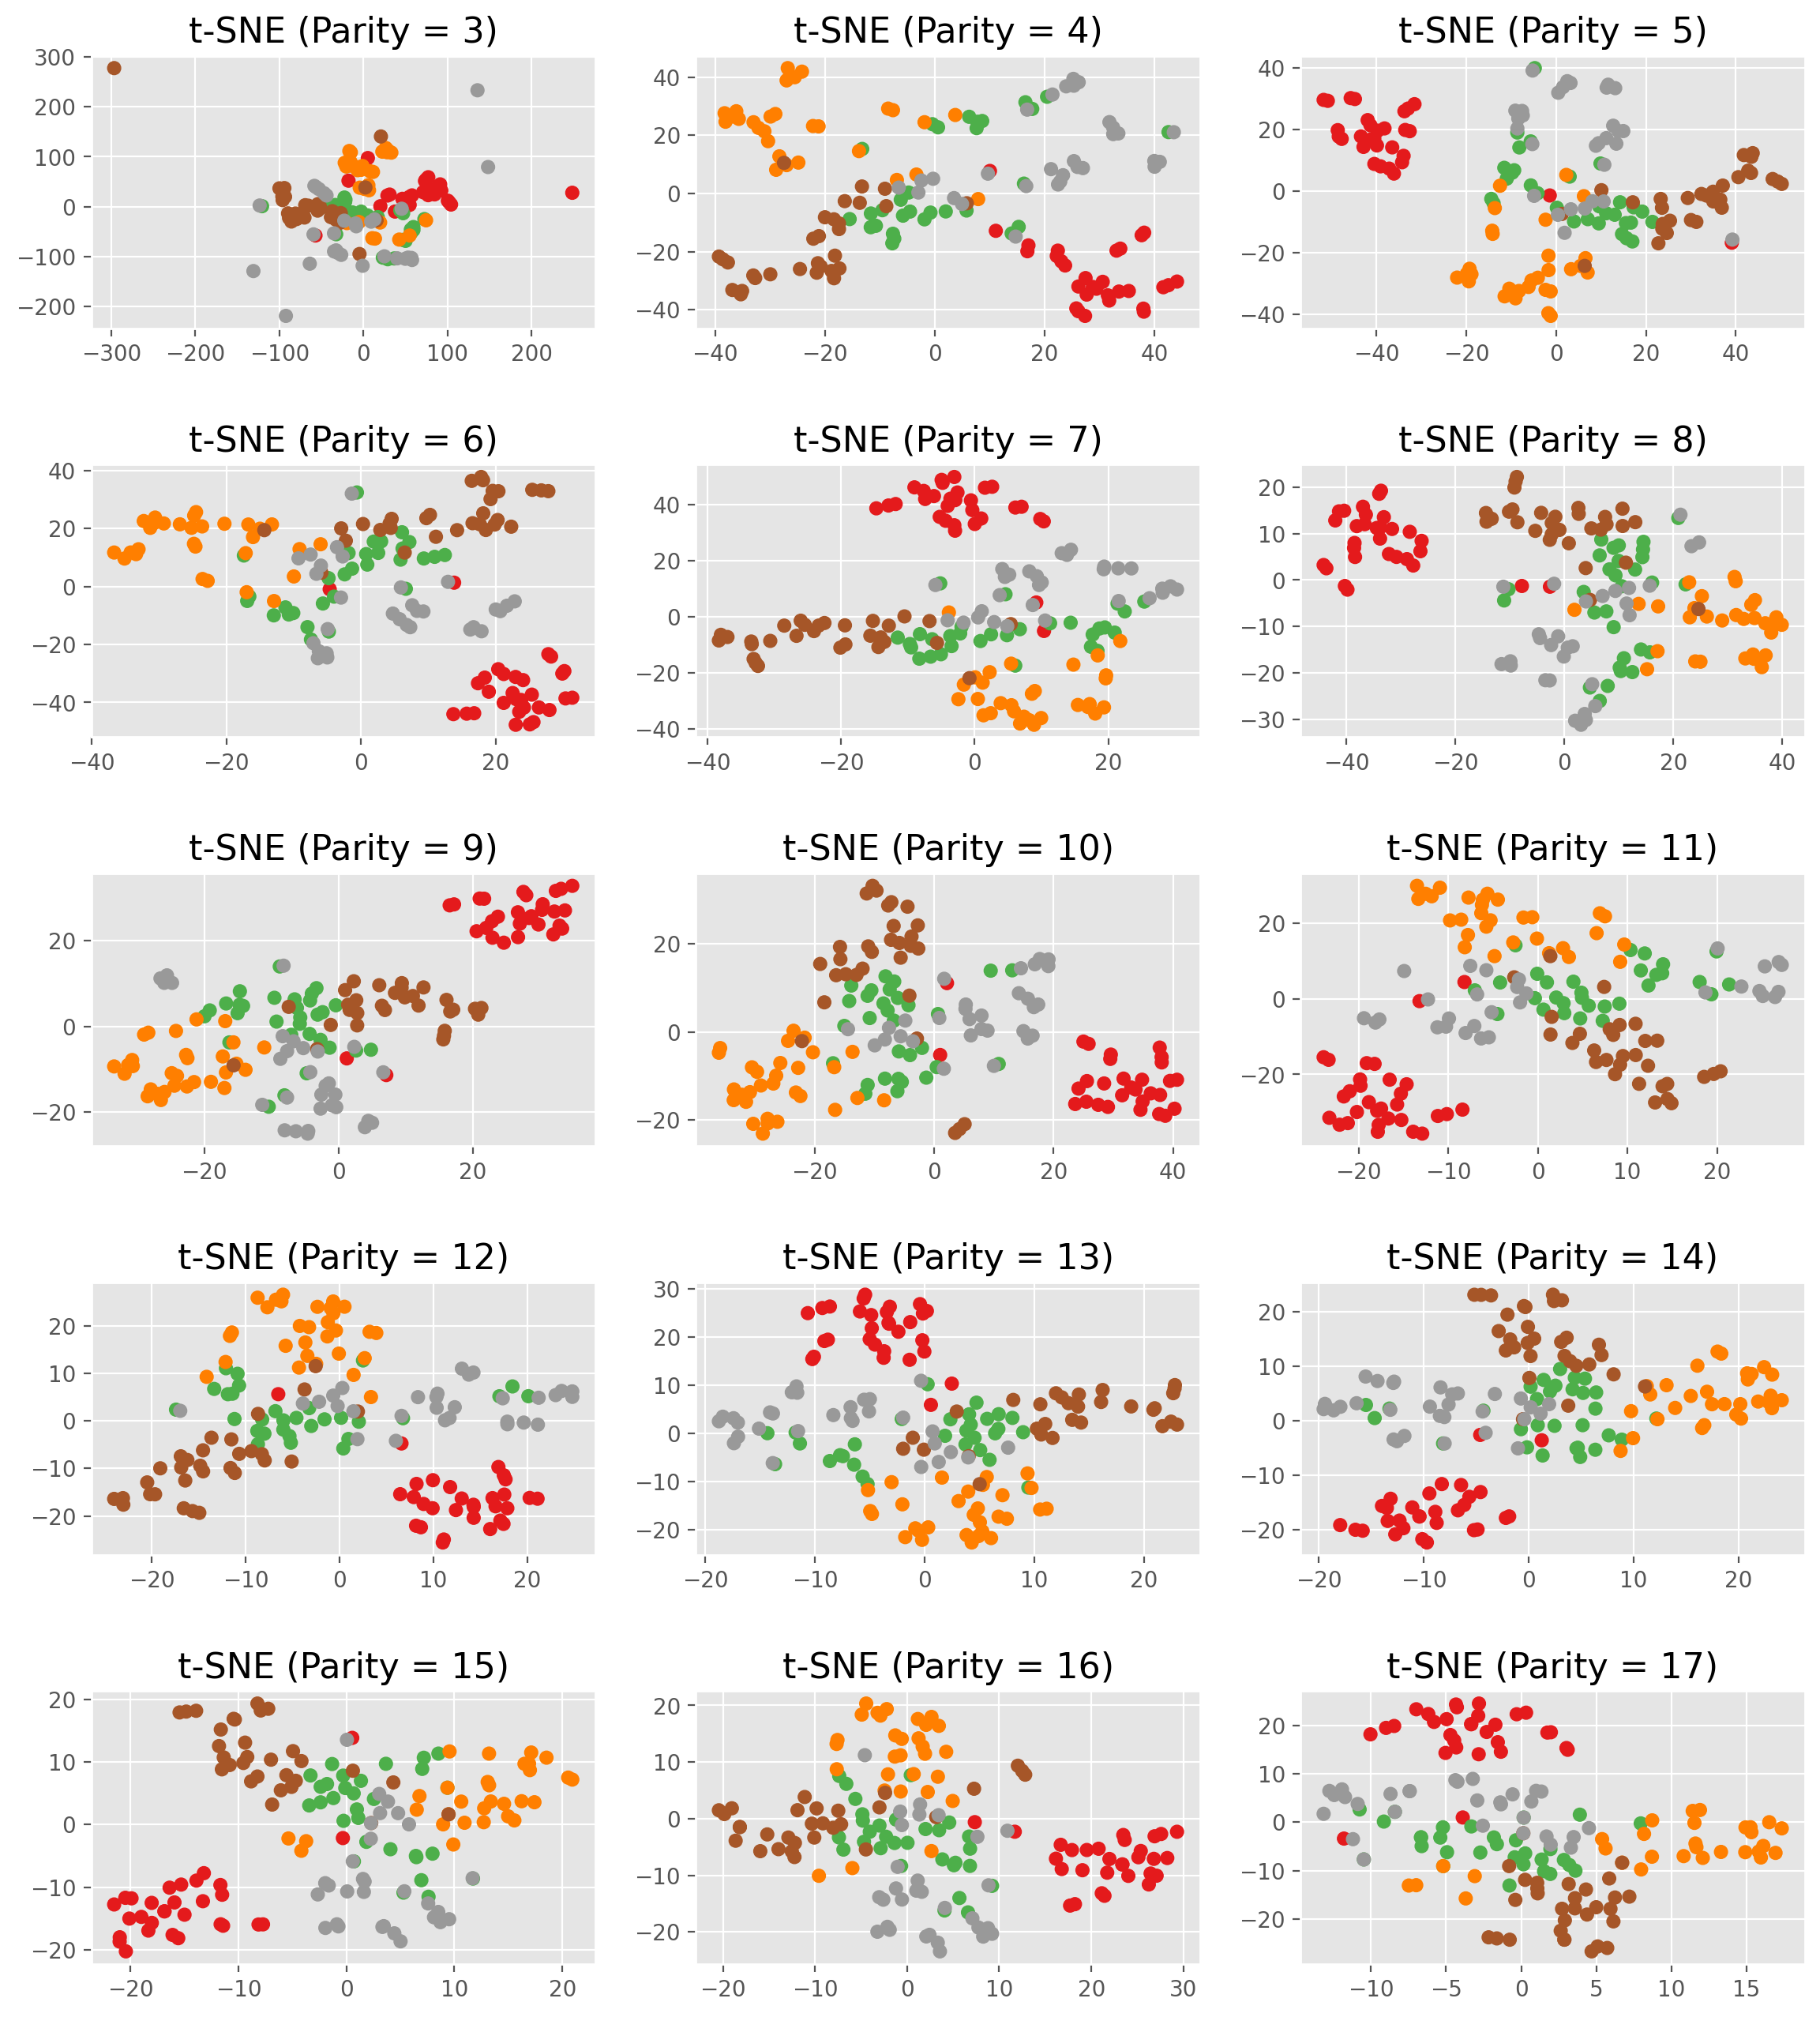

In [36]:
plottSNE([x for x in range(3,18)], d150embd, d150wrds, "sne_exploration1.png")

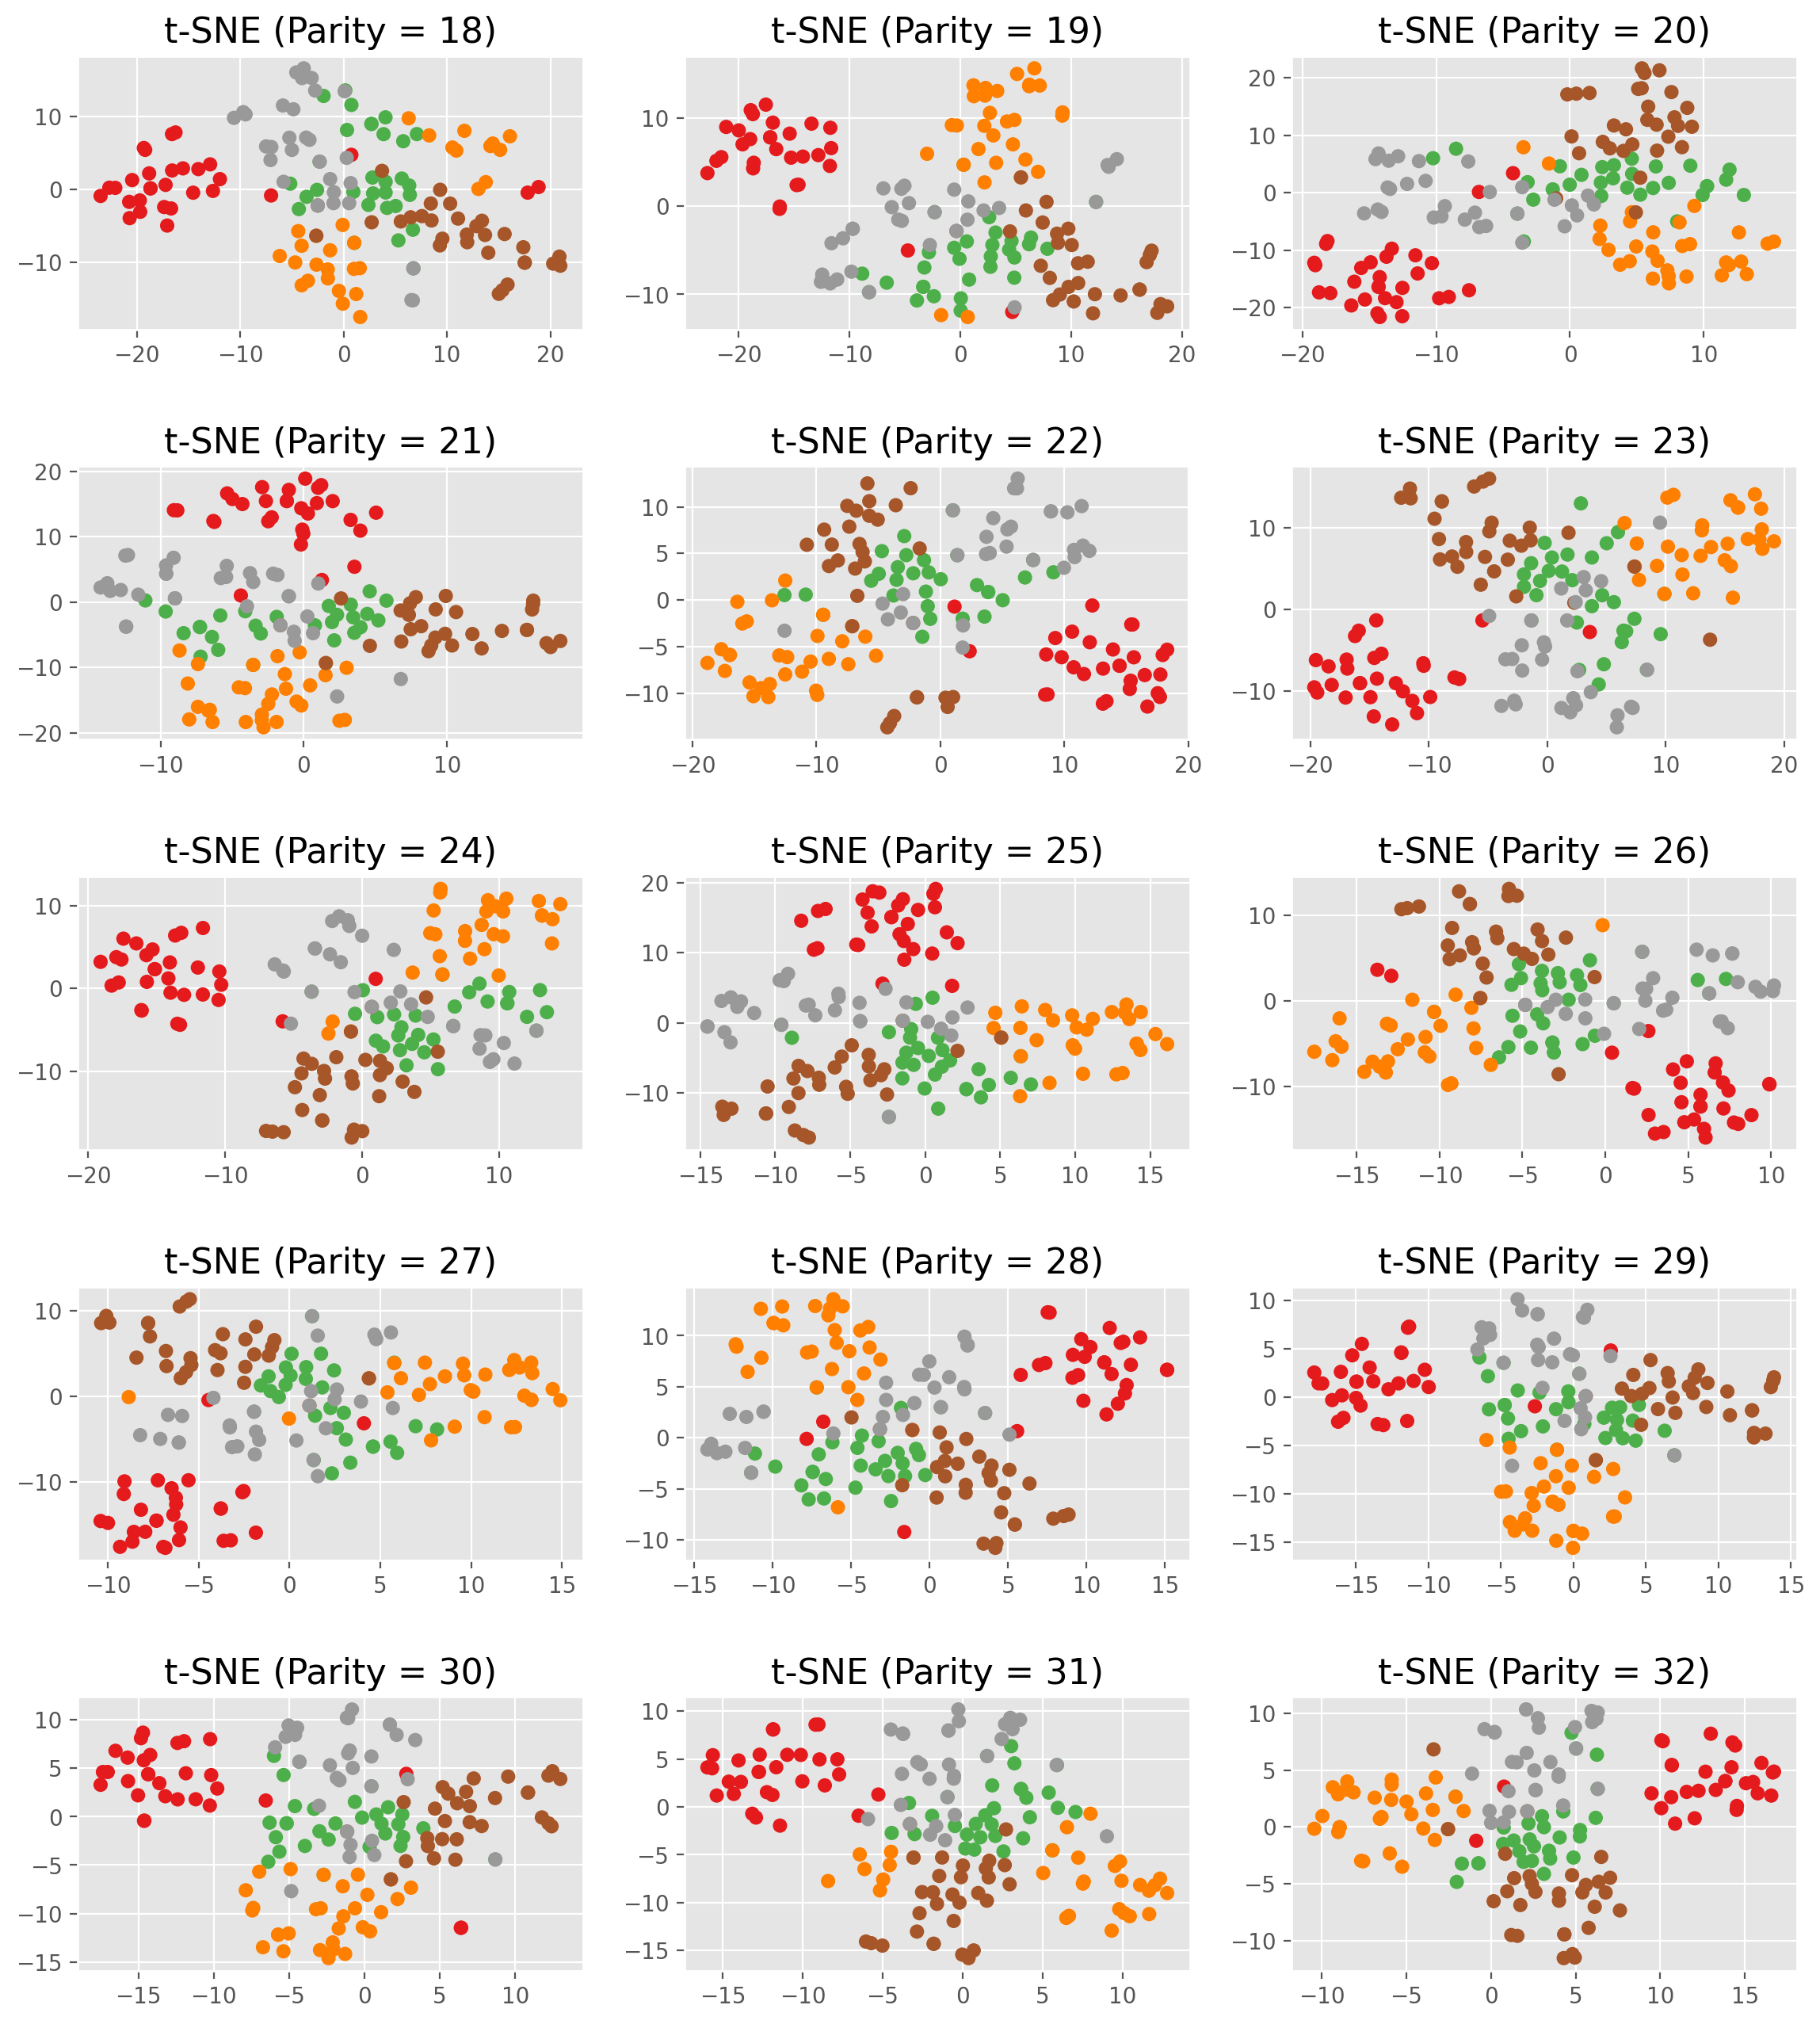

In [37]:
plottSNE([x for x in range(18,33)], d150embd, d150wrds, "sne_exploration2.png")

In [ ]:
plottSNE([x for x in range(33,48)], d150embd, d150wrds, "sne_exploration1.png")

In [ ]:
plottSNE([x for x in range(48,63)], d150embd, d150wrds, "sne_exploration1.png")

"The perplexity is defined as k = 2^S where S is the Shannon entropy of the conditional probability distribution. The perplexity of a k-sided die is k, so that k is effectively the number of nearest neighbors t-SNE considers when generating the conditional probabilities. 

Larger perplexities lead to more nearest neighbors and less sensitive to small structure. Conversely a lower perplexity considers a smaller number of neighbors, and thus ignores more global information in favour of the local neighborhood. As dataset sizes get larger more points will be required to get a reasonable sample of the local neighborhood, and hence larger perplexities may be required. Similarly noisier datasets will require larger perplexity values to encompass enough local neighbors to see beyond the background noise." - scikit-learn.

How can that be used to explain the graph we got? It can be broken down to the following questions:
1. What is "global information" and "small structure"? But really, what does "structure" mean?
2. How about dataset size?
3. 

Because t-SNE has a non-convex cost function, it can be stuck in local minimas, 
and therefore different initializations could yield different results.

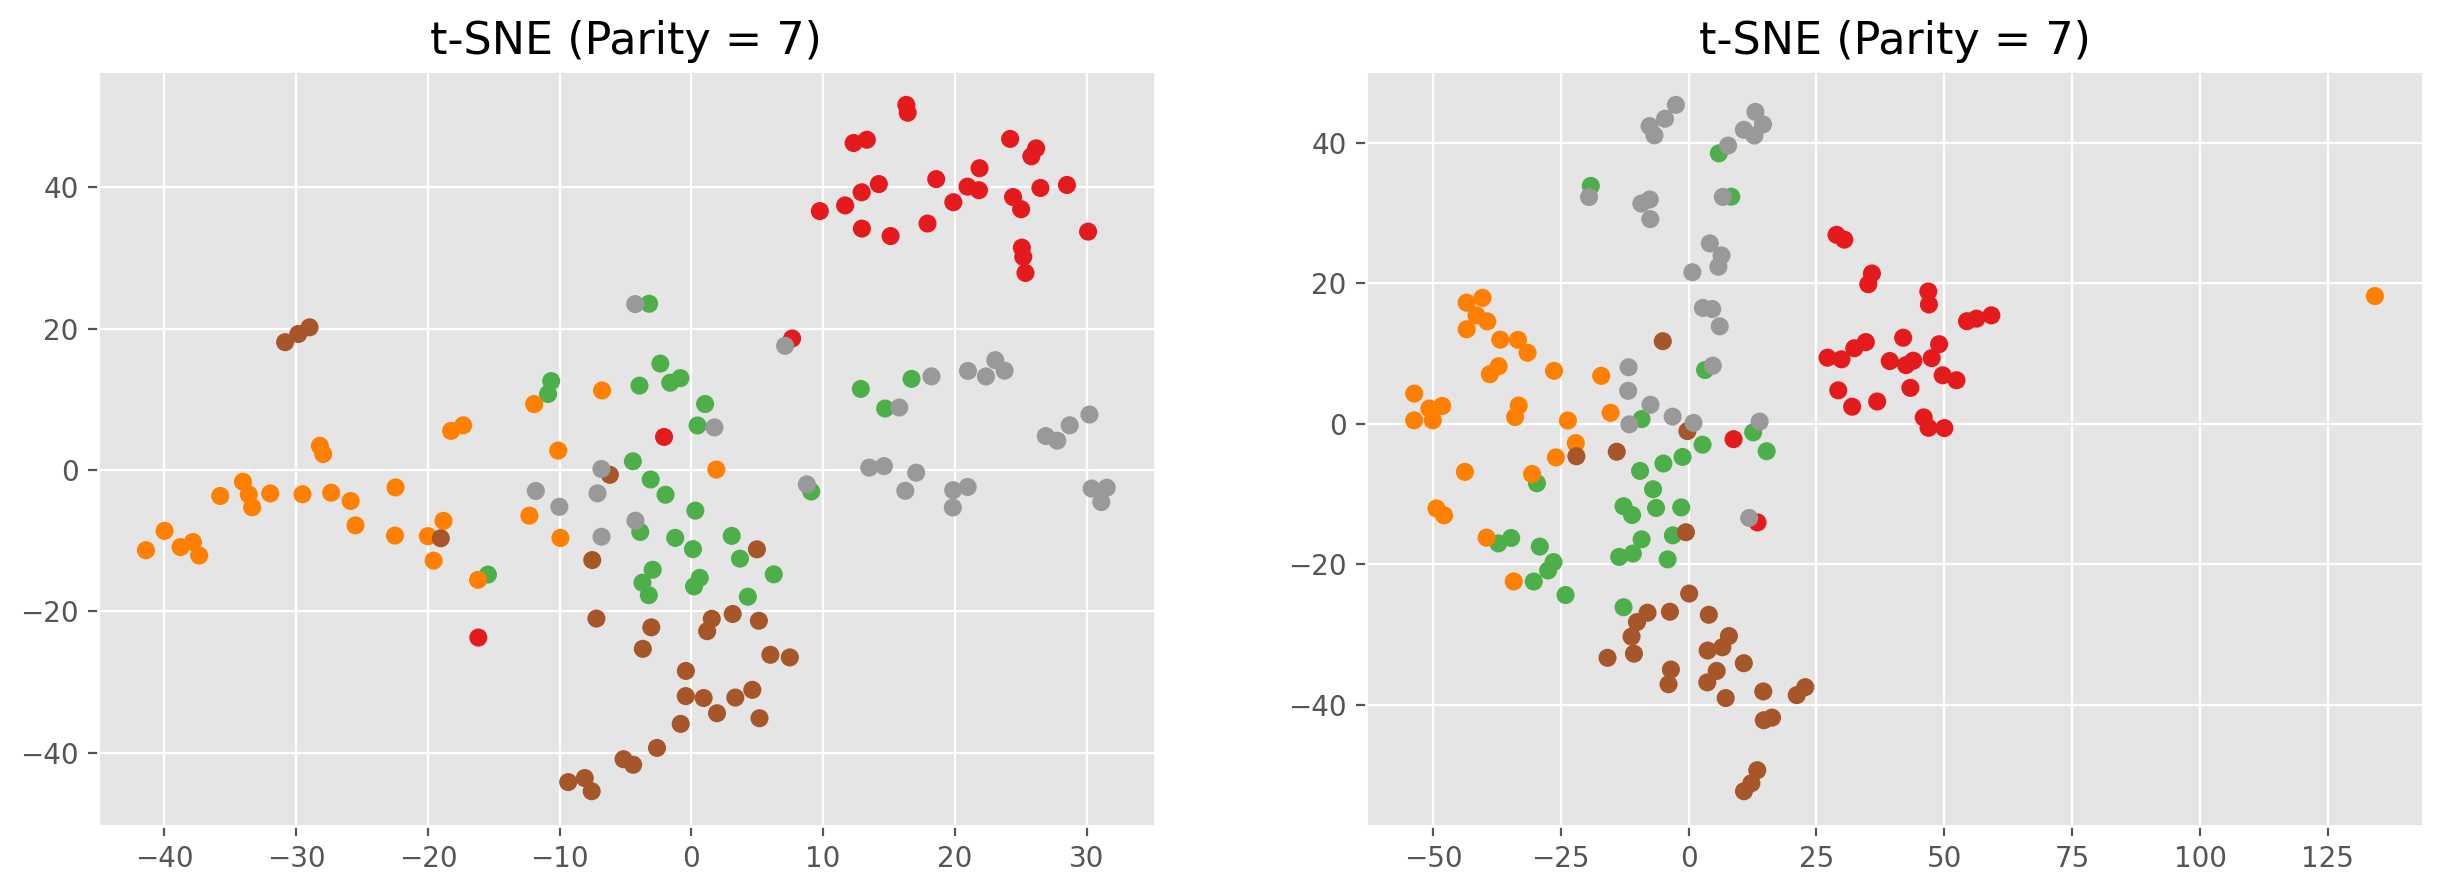

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15,5), facecolor='w', edgecolor='k')
axs = axs.ravel()

parityRng = [7,7] # set range to plot parity over
for i, p in enumerate(parityRng):
    X_embd = TSNE(n_components=2, perplexity=p).fit_transform(np.asarray(d150embd))
    title = "t-SNE (Parity = " + str(p) + ")" 
    axs[i].scatter(X_embd[:, 0], X_embd[:, 1], c=np.asarray(d150wrds[:,1], dtype=int), cmap="Set1")
    axs[i].set_title(title)

## Clustering (20pts)

In [7]:
train_df = pd.DataFrame(data={"embeddings":d150embd, "baseWord": d150wrds[:,0], "cluster":d150wrds[:,1]})
train_df.head()

,embeddings,baseWord,cluster
0,"[-0.16572, -0.08395, 0.02257, 0.03972, 0.30814...",flight,1
1,"[-0.16572, -0.08395, 0.02257, 0.03972, 0.30814...",flight,1
2,"[-0.25592, -0.33874, -0.09671, -0.38996, -0.19...",plane,1
3,"[-0.57264, 0.35847, 0.37772, 0.17483, 0.42896,...",flights,1
4,"[-0.1608, -0.1792, 0.06939, 0.32445, 0.51012, ...",boarding,1


In [13]:
def purity(y_true, y_pred):
    cMat = cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(cMat, axis=0)) / np.sum(cMat)

In [14]:
purityScore = []
randScore = []
inertiaScore = []
mutualInfoScore = []

kRange = [x for x in range(2,21)]

for k in kRange:
    kmeans = KMeans(n_clusters=k).fit(d150embd)
    predsLabels = kmeans.labels_
    purityScore.append(purity(d150wrds[:,1], predsLabels))
    randScore.append(adjusted_rand_score(d150wrds[:,1], predsLabels))
    inertiaScore.append(kmeans.inertia_)
    mutualInfoScore.append(normalized_mutual_info_score(d150wrds[:,1], predsLabels))

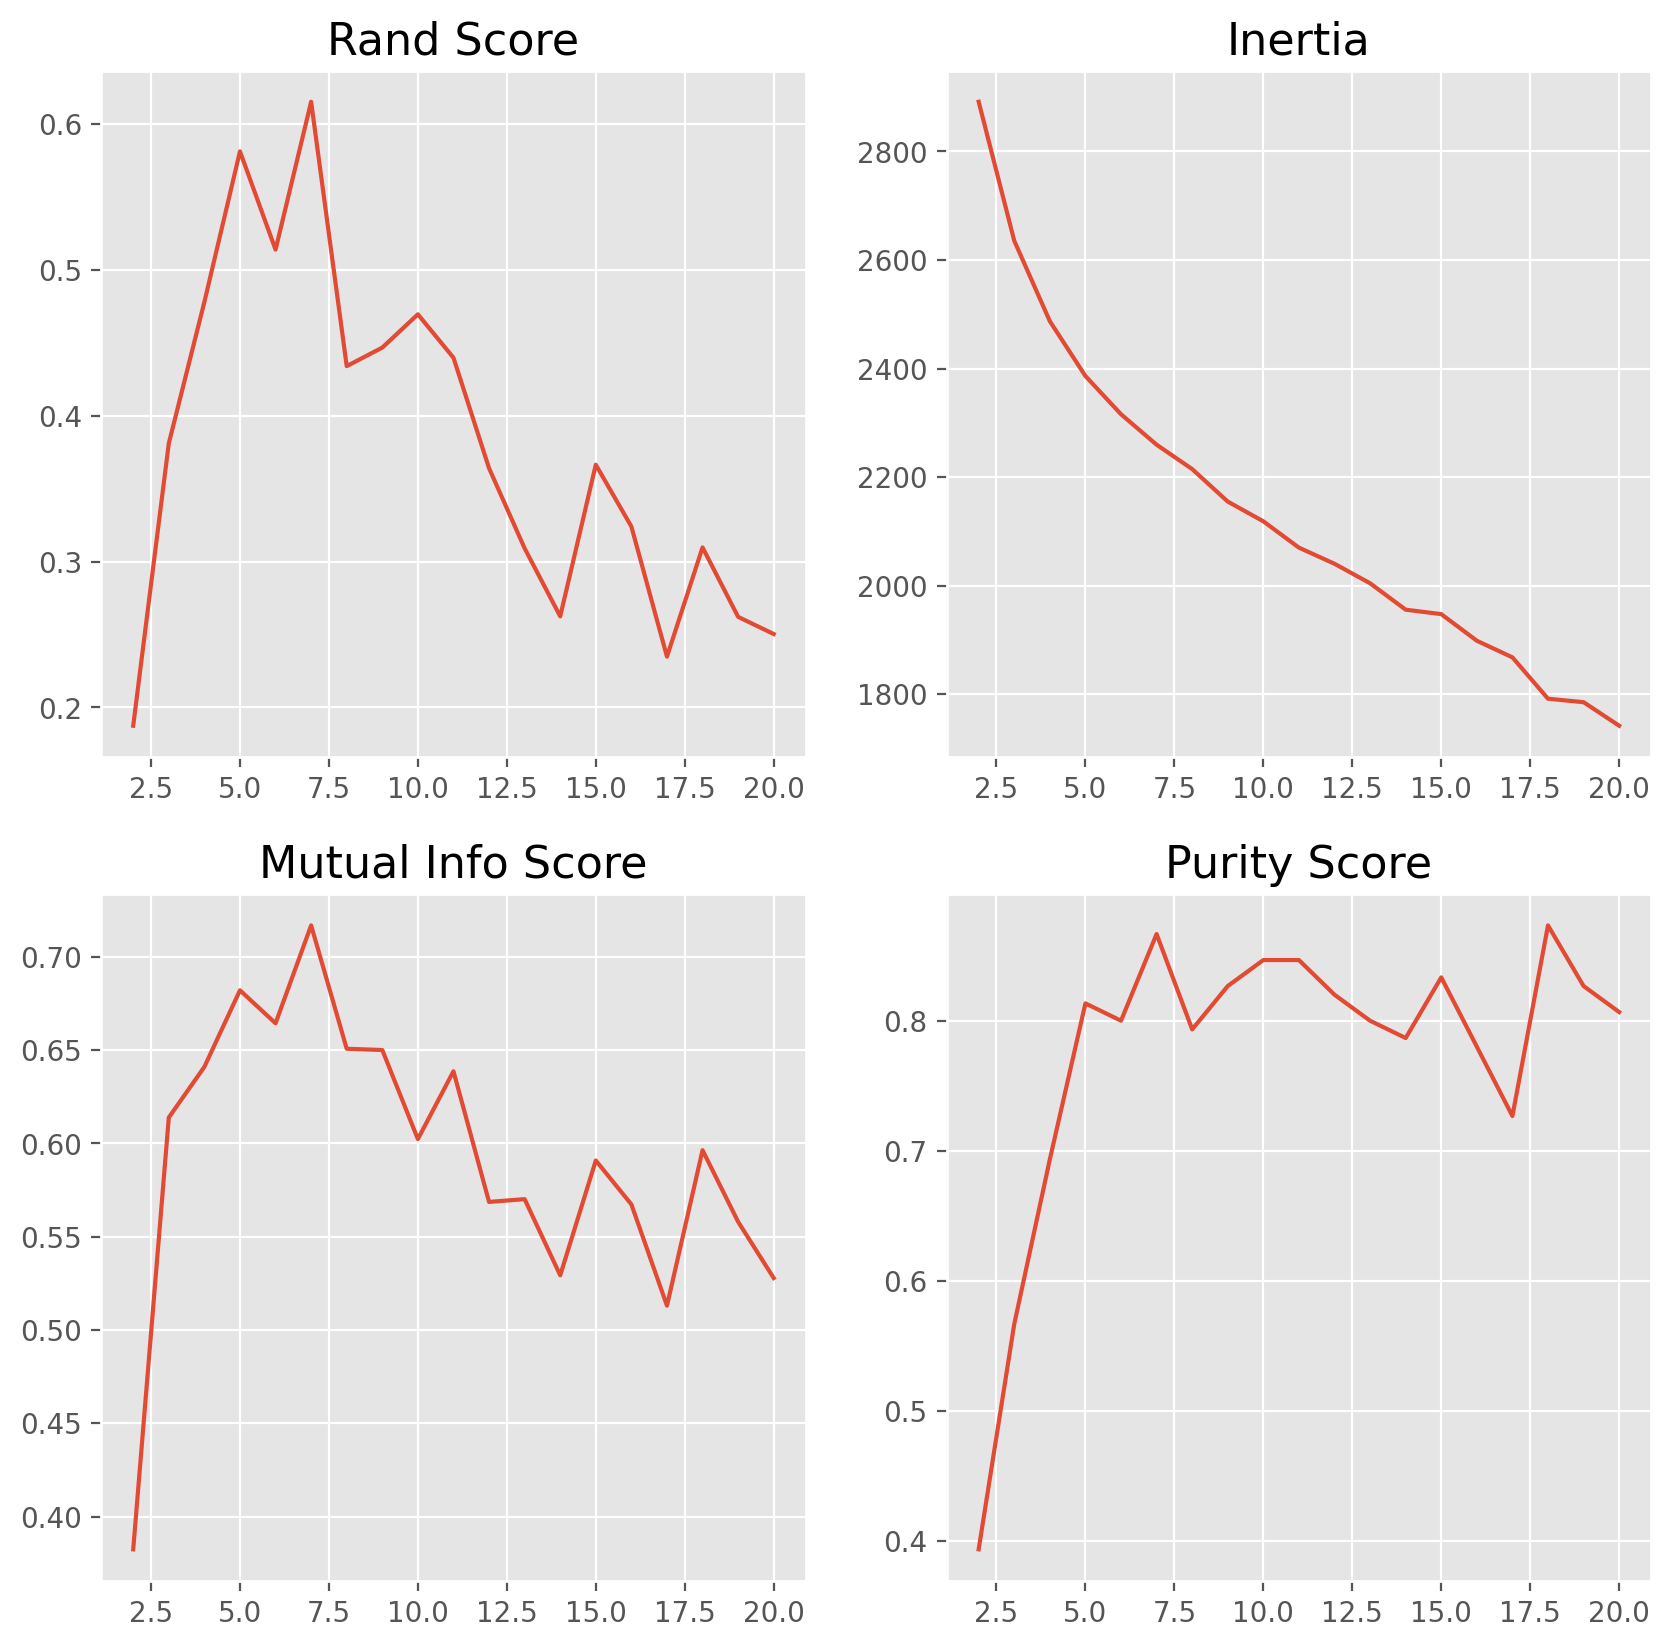

In [20]:
def clusteringPlots(k, rS, iS, miS, pS, fName):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.plot(k, rS)
    plt.title("Rand Score")
    plt.subplot(2,2,2)
    plt.plot(k, iS)
    plt.title("Inertia")
    plt.subplot(2,2,3)
    plt.plot(k, miS)
    plt.title("Mutual Info Score")
    plt.subplot(2,2,4)
    plt.plot(k, pS)
    plt.title("Purity Score")
    plt.savefig(fName)
    return

clusteringPlots(kRange, randScore, inertiaScore, mutualInfoScore, purityScore, "kmeansPlots.png")

`Purity: Purity is a measure of the extent to which clusters contain a single class. Its calculation can be thought of as follows: For each cluster, count the number of data points from the most common class in said cluster. Now take the sum over all clusters and divide by the total number of data points.`

In [17]:
kTmp = KMeans(n_clusters=7).fit(d150embd)

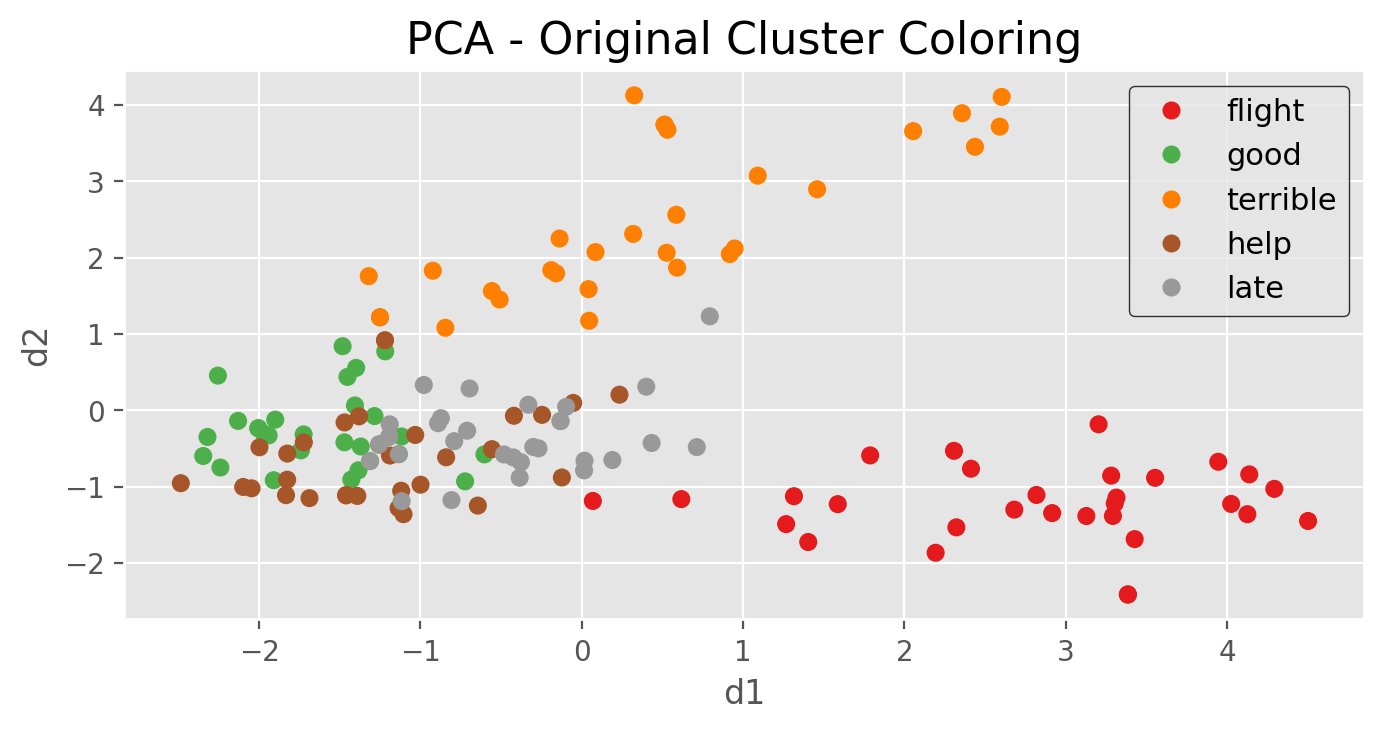

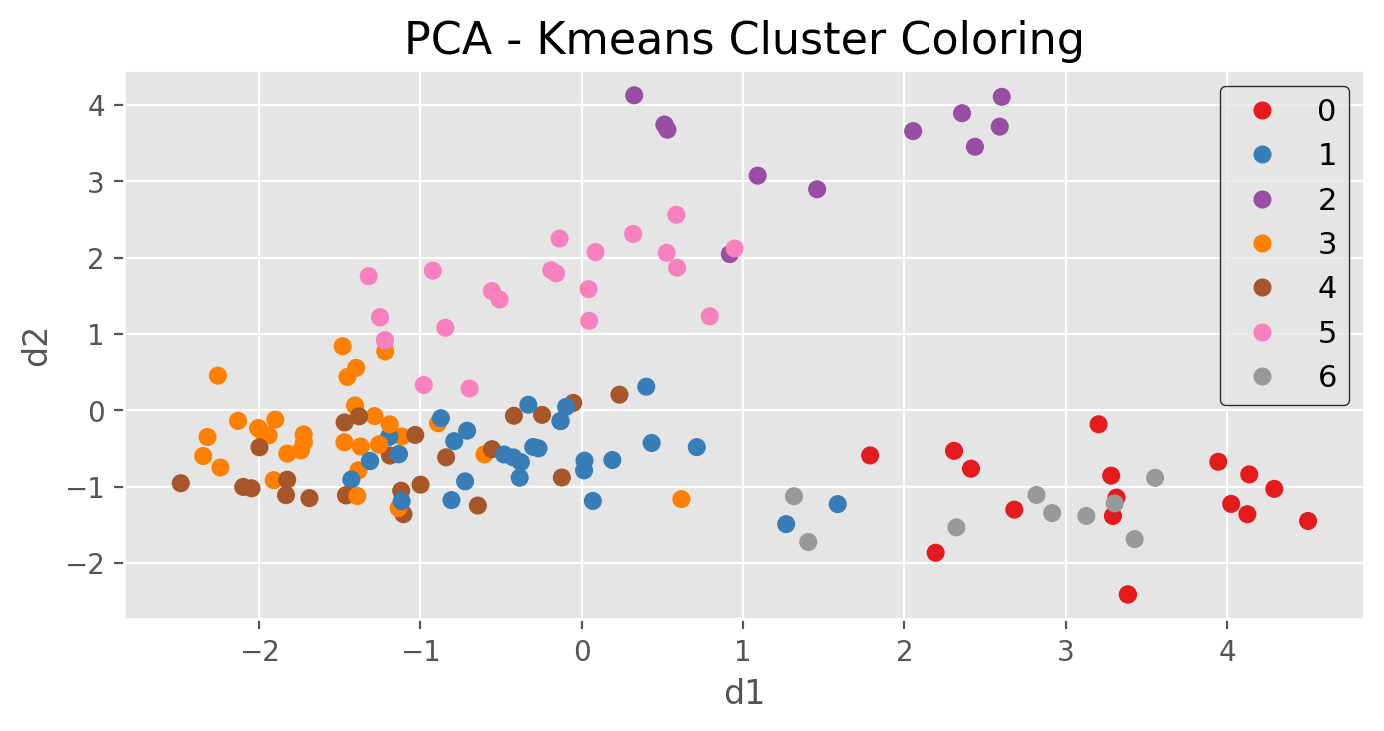

In [19]:
# Not required but thought it could be interesting to see the difference of how they were clustered
# Below is PCA but colored by the labels from kmeans clusters
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=np.asarray(d150wrds[:,1], dtype=int), cmap="Set1")
plt.legend(handles=scatter.legend_elements()[0], labels=seed_words)
plt.title("PCA - Original Cluster Coloring")
plt.ylabel("d2")
plt.xlabel("d1")
plt.show()

plt.figure(figsize=(8,8))
plt.subplot(2,1,2)
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kTmp.labels_, cmap="Set1")
plt.legend(handles=scatter.legend_elements()[0], labels=list(np.arange(0,7)))
plt.title("PCA - Kmeans Cluster Coloring")
plt.ylabel("d2")
plt.xlabel("d1")
plt.show();